# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

In [755]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats

In [756]:
df = pd.read_csv("census11sample.csv").drop("Unnamed: 0", axis=1)
df.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19


## Divide the data (2 marks)

In [757]:
# divided 50/50
sample_explore = df.sample(int(len(df.index)/2))
sample_test = df[~df.index.isin(sample_explore.index)]

sample_explore.head()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
652,30,12,3,44,6,28,15,52,48
713,27,34,5,66,14,64,46,24,69
213,26,52,40,35,46,27,13,55,45
798,1,38,65,71,16,30,56,47,67
962,0,0,38,81,21,21,32,53,53


## Explore the data (5 marks)

First, I will order the data by median value for neat presentation

In [758]:
sample_explore = sample_explore.reindex(sample_explore.median().sort_values().index, axis=1)
sample_test = sample_test.reindex(sample_explore.median().sort_values().index, axis=1)
sample_explore.head()
# sample_test.head()

,London,Yorkshire and The Humber,East Midlands,South East,North West,North East,West Midlands,East of England,South West
652,15,3,44,52,12,30,6,28,48
713,46,5,66,24,34,27,14,64,69
213,13,40,35,55,52,26,46,27,45
798,56,65,71,47,38,1,16,30,67
962,32,38,81,53,0,0,21,21,53


<h3>Boxplot

Text(0.5, 1.0, 'Population age by region')

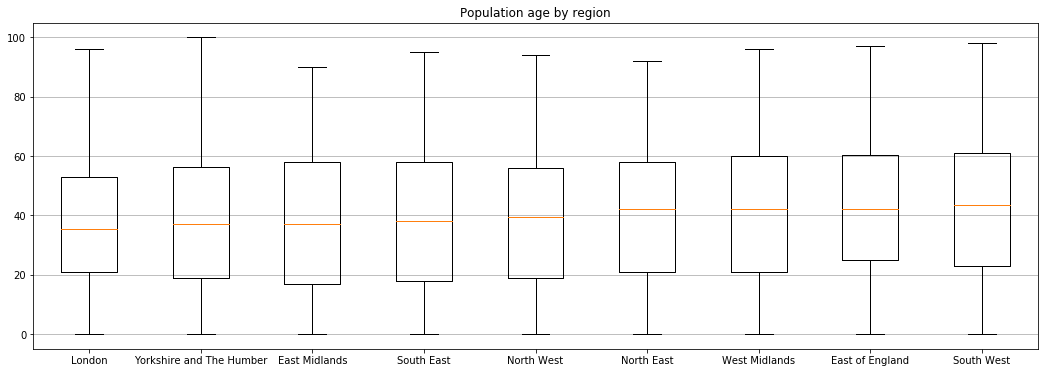

In [759]:
fig, ax = plt.subplots(figsize=(18,6))
plt.grid(axis='y')

ax.boxplot([sample_explore[key] for key in sample_explore.keys()])
ax.set_xticklabels(sample_explore.keys())
plt.title("Population age by region")

<h3>Histogram (visually similar to line plot though)

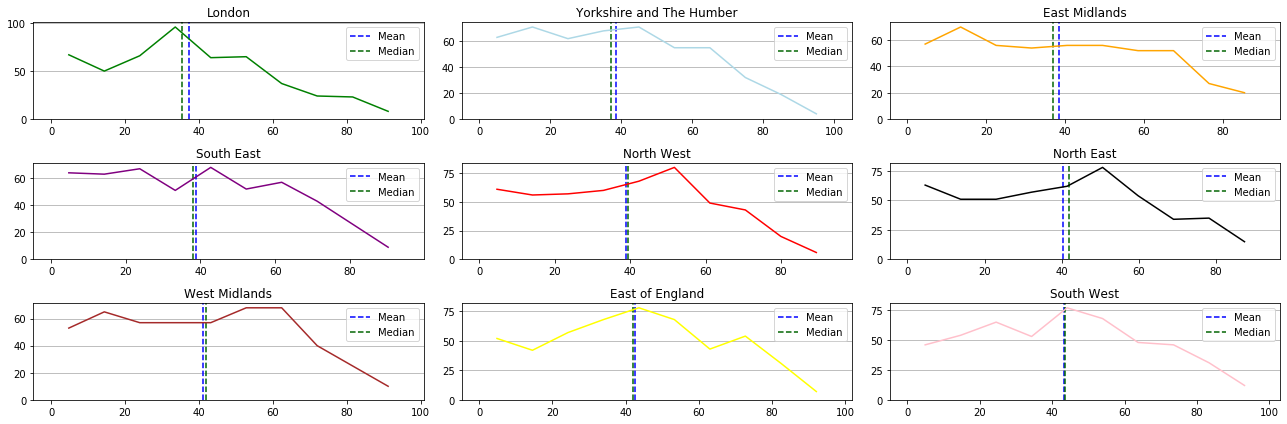

In [760]:
# a modified histogram for better visualisation
colours = ['green', 'lightblue', 'orange', 'purple', 'red', 'black', 'brown', 'yellow', 'pink']

f, a = plt.subplots(3, 3, figsize=(18,6))
a = a.ravel()

for idx, ax in enumerate(a):
    title = sample_explore.keys()[idx]
    data = sample_explore[title]
    ax.set_title(title)

    mean = data.mean()
    median = data.median()
    ax.axvline(mean, linestyle="--", color='blue')
    ax.axvline(median, linestyle="--", color='darkgreen')

    n, x, bars = ax.hist(data, bins=10)
    bin_centers = 0.5 * (x[1:] + x[:-1])
    ax.plot(bin_centers, n, color=colours[idx])
    ax.grid(axis='y')

    for bar in bars:
        bar.remove()

    ax.legend(['Mean', 'Median'])

plt.tight_layout()

<h3>Further information is needed.</h3> The data doesn't look normal, but the test will be conducted in the hope that the sample is small enough to look that way because of random variation for WM, EE, SE or SW.

H0: sample looks Gaussian.

H1: sample does not look Gaussian.

A Shapiro-Wilk test will be performed to support or reject that the given values are normally distributed.

In [761]:
n = 0

alpha = 0.05

for key in sample_explore.keys():
    w, p = scipy.stats.shapiro(sample_explore[key])

    # print(f"W-statistic: {w}\nP-value: {p}")

    if p > alpha:
        n += 1

    # if p > alpha:
    #     print(f"Sample {key} looks Gaussian.")
    # else:
    #     print(f"Sample {key} does not look Gaussian.")

print(f"{n} samples seem Gaussian.")

0 samples seem Gaussian.


Not one of them looks like a normal distribution yet, so another couple of tests will be conducted, to make sure:

In [762]:
# Kolmogorov test
n = 0

alpha = 0.05

for key in sample_explore.keys():
    _, p = scipy.stats.kstest(sample_explore[key], 'norm')

    if p > alpha:
        n += 1

print(f"{n} samples seem normally distributed.")

0 samples seem normally distributed.


In [763]:
# D'Agnostino K^2 test
n = 0

alpha = 0.05

for key in sample_explore.keys():
    _, p = scipy.stats.normaltest(sample_explore[key])

    if p > alpha:
        n += 1

print(f"{n} samples seem normally distributed.")

0 samples seem normally distributed.


Bummer.

## State your hypothesis, and state the evidence that justifies it. (2 marks)

<h3>H1: London and South West have respectively the youngest and the oldest populations in England.

This is supported by the ordering of the medians for the boxplots and the observation that means and medians are close together in the histograms.

## Plan the test. (3 marks)

<h3>H0: London and South West do not have the youngest and oldest regional populations in England, respectively.

This will be further broken down into:

HL0: London does not have the youngest population in England.

HL1: London has the youngest population in England.

HSW0: South West does not have the oldest population in England.

HSW1: South west has the oldest population in England.

<h3>Testing:

The hypothesis will be tested by determining the statistically significant ordering of means around London and South West. 7 Z-tests will be performed for both London and South West, one for each comparison. Despite the lack of normalcy in the data, it is large enough for Z-tests. There is no need for a test between London and South West, because the alternative hypothesis already requires that one of them is below all other stats and the other is above them.

For the results, a certainty of at least 90% should be satisfactory (since we are conducting 14 tests and the uncertainties multiply). That means (1-alpha)^14 > 0.9 and leaves a maximum alpha of about 0.0074. We will round that up to 0.0075.

## Perform the statistical test of the hypothesis. (5 marks)

<b>Z-test between London and X</b>, where X is the next smallest age mean sample:

H0: London and X populations have virtually the same age group.

H1: London's population is statistically significantly younger than that of X

In [764]:
alpha = 0.0075
z = scipy.stats.norm.ppf(alpha)

key = sample_explore.median().sort_values().index[1]

mu1 = sample_test['London'].mean()
mu2 = sample_test[key].mean()
s21 = sample_test['London'].var()
s22 = sample_test[key].var()
n1 = len(sample_test['London']) # known but for consistency
n2 = len(sample_test[key]) # equal to n1 but for consistency

Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

if Z < z:
    print(f"Rejected the null hypothesis for London and {key}.")
else:
    print(f"Failed to reject the null hypothesis for London and {key}.")

Rejected the null hypothesis for London and Yorkshire and The Humber.


<b>Z-tests between London and the rest of the regions:</b>

In [781]:
alpha = 0.0075
z = scipy.stats.norm.ppf(alpha)

for key in [k for k in sample_test.keys() if k not in ['London', 'South West']]:
    mu1 = sample_test['London'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['London'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['London']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)
    # print(Z-z)
    if Z < z:
        print(f"Rejected the null hypothesis for London and {key}")
    else:
        print(f"Failed to reject the null hypothesis for London and {key}.")

Rejected the null hypothesis for London and Yorkshire and The Humber
Rejected the null hypothesis for London and East Midlands
Rejected the null hypothesis for London and South East
Rejected the null hypothesis for London and North West
Rejected the null hypothesis for London and North East
Rejected the null hypothesis for London and West Midlands
Rejected the null hypothesis for London and East of England


<b>Tests between South West and the rest of the regions:</b>

In [785]:
alpha = 0.0075
z = scipy.stats.norm.ppf(1 - alpha)

for key in [k for k in sample_test.keys() if k not in ['London', 'South West']]:
    mu1 = sample_test['South West'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['South West'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['South West']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)
    # print(Z-z)
    if Z > z:
        print(f"Rejected the null hypothesis for South West and {key}")
    else:
        print(f"Failed to reject the null hypothesis for South West and {key}.")

Rejected the null hypothesis for South West and Yorkshire and The Humber
Failed to reject the null hypothesis for South West and East Midlands.
Failed to reject the null hypothesis for South West and South East.
Rejected the null hypothesis for South West and North West
Failed to reject the null hypothesis for South West and North East.
Rejected the null hypothesis for South West and West Midlands
Failed to reject the null hypothesis for South West and East of England.


Unfortunate.

<b>We conclude that H0 cannot be ruled out with over 90% accuracy through this method.</b> Therefore, an attempt will be made to optimise the number of comparisons and allow for a higher alpha-level. First, we will visualise the explore sample again:

<h3>Errorbar plots

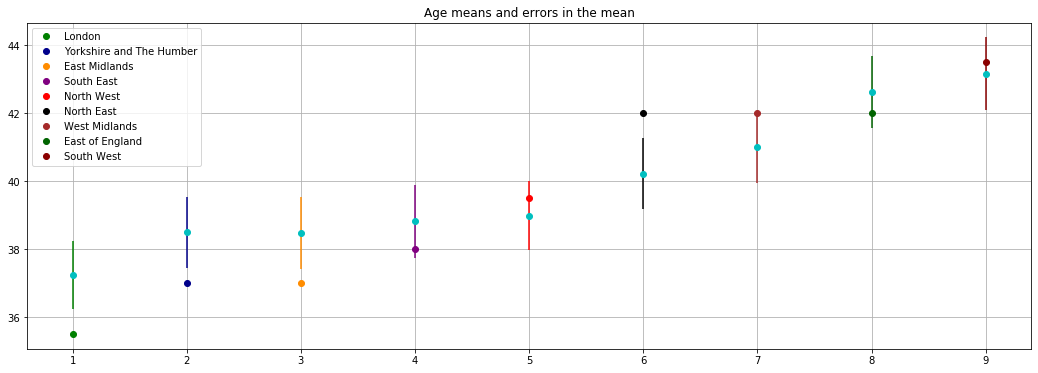

In [798]:
plt.figure(figsize=(18,6))
plt.grid()
plt.title('Age means and errors in the mean')

colours = ['green', 'darkblue', 'darkorange', 'purple', 'red', 'black', 'brown', 'darkgreen', 'darkred']

for idx, key in enumerate(sample_explore.keys()):
    mean = sample_explore[key].mean()
    sem = sample_explore[key].sem()
    median = sample_explore[key].median()

    plt.errorbar(x=idx+1, y=mean, yerr=sem, fmt='oc', ecolor=colours[idx])
    plt.errorbar(x=idx+1, y=median, color=colours[idx], fmt='o', label=key)

plt.legend()

Now it seems apparent that London is younger than at least the oldest four samples. In fact, this is confirmed by the alpha=0.0075 z-tests. Therefore we will assume them to be so. Similarly, we will rule out the possibility that the bottom four samples are older than South West. We will also conduct a test between the fourth and the sixth to check whether the number of tests can be further decreased.

In [787]:
alpha = 0.05
z = scipy.stats.norm.ppf(alpha)

key1 = sample_explore.median().sort_values().index[3]
key2 = sample_explore.median().sort_values().index[5]

mu1 = sample_test[key1].mean()
mu2 = sample_test[key2].mean()
s21 = sample_test[key1].var()
s22 = sample_test[key2].var()
n1 = len(sample_test[key1]) # known but for consistency
n2 = len(sample_test[key2]) # equal to n1 but for consistency

Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

if Z < z:
    print("Rejected the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.")

Failed to reject the null hypothesis.


Since the difference between the two is too small even at alpha=0.05, we will resort to removing the 7 tests mentioned above. Maintaining a 90% level, the new maximum alpha is about 0.015.

In [769]:
alpha = 0.015
z = scipy.stats.norm.ppf(alpha)

for key in [k for k in sample_test.keys() if k not in ['London', 'South West', 'East of England', 'South East', 'North East', 'West Midlands']]:
    mu1 = sample_test['London'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['London'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['London']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    if Z < z:
        print(f"Rejected the null hypothesis for London and {key}")
    else:
        print(f"Failed to reject the null hypothesis for London and {key}.")

Rejected the null hypothesis for London and Yorkshire and The Humber
Rejected the null hypothesis for London and East Midlands
Rejected the null hypothesis for London and North West


In [770]:
alpha = 0.015
z = scipy.stats.norm.ppf(1 - alpha)

for key in [k for k in sample_test.keys() if k not in ['London', 'South West', 'North West', 'Yorkshire and The Humber', 'East Midlands']]:
    mu1 = sample_test['South West'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['South West'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['South West']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    if Z > z:
        print(f"Rejected the null hypothesis for South West and {key}")
    else:
        print(f"Failed to reject the null hypothesis for South West and {key}.")

Failed to reject the null hypothesis for South West and South East.
Rejected the null hypothesis for South West and North East
Rejected the null hypothesis for South West and West Midlands
Failed to reject the null hypothesis for South West and East of England.


<b>H0 can still not be ruled out.</b> We will compute the maximum degree to which we can be sure that each region is older than London (except those we already ruled out):

In [788]:
results = {}

for key in [k for k in sample_test.keys() if k not in ['London', 'South West', 'East of England', 'South East', 'North East', 'West Midlands']]:
    mu1 = sample_test['London'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['London'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['London']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    alpha = scipy.stats.norm.cdf(Z)
    results[key] = 1 - alpha

for key in results:
    print(f"{key}: {int(results[key] * 1000) / 1000}")

Yorkshire and The Humber: 0.999
East Midlands: 0.999
North West: 0.999


And the same for South West:

In [789]:
for key in [k for k in sample_test.keys() if k not in ['London', 'South West', 'North West', 'Yorkshire and The Humber', 'East Midlands']]:
    mu1 = sample_test['South West'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['South West'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['South West']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    alpha = scipy.stats.norm.cdf(Z)
    results[key] = alpha

for key in results:
    print(f"{key}: {int(results[key] * 1000) / 1000}")

Yorkshire and The Humber: 0.999
East Midlands: 0.999
North West: 0.999
South East: 0.938
North East: 0.987
West Midlands: 0.996
East of England: 0.984


Finally, to get the degree to which we are certain that London and South West are the extremes we will multiply the certainties of each comparison:

In [773]:
final = 1
for key in results.keys():
    final *= results[key]

final

0.9089402760323713

To justify the lengths at which we went for this number, let us calculate the maximum degree to which we can rule out the null hypothesis by adjusting the alpha values for each test from the initial set of tests:

In [774]:

results2 = []

for key in [k for k in sample_test.keys() if k not in ['London', 'South West']]:
    mu1 = sample_test['London'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['London'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['London']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    alpha = scipy.stats.norm.cdf(Z)
    results2.append(1-alpha)

for key in [k for k in sample_test.keys() if k not in ['London', 'South West']]:
    mu1 = sample_test['South West'].mean()
    mu2 = sample_test[key].mean()
    s21 = sample_test['South West'].var()
    s22 = sample_test[key].var()
    n1 = len(sample_test['South West']) # known but for consistency
    n2 = len(sample_test[key]) # equal to n1 but for consistency

    Z = (mu1 - mu2)/((s21/n1)+(s22/n2))**(1/2)

    alpha = scipy.stats.norm.cdf(Z)
    results2.append(alpha)

final2 = 1
for i in results2:
    final2 *= i

final2

0.8962716814167634

<b>A whopping 1.4% difference.</b>

## Conclusions. (2 Marks) 

Using z-tests, I find that the null hypothesis is ruled out at 90.89% level with additional assumptions, or at 89.63% level without.

# The end!